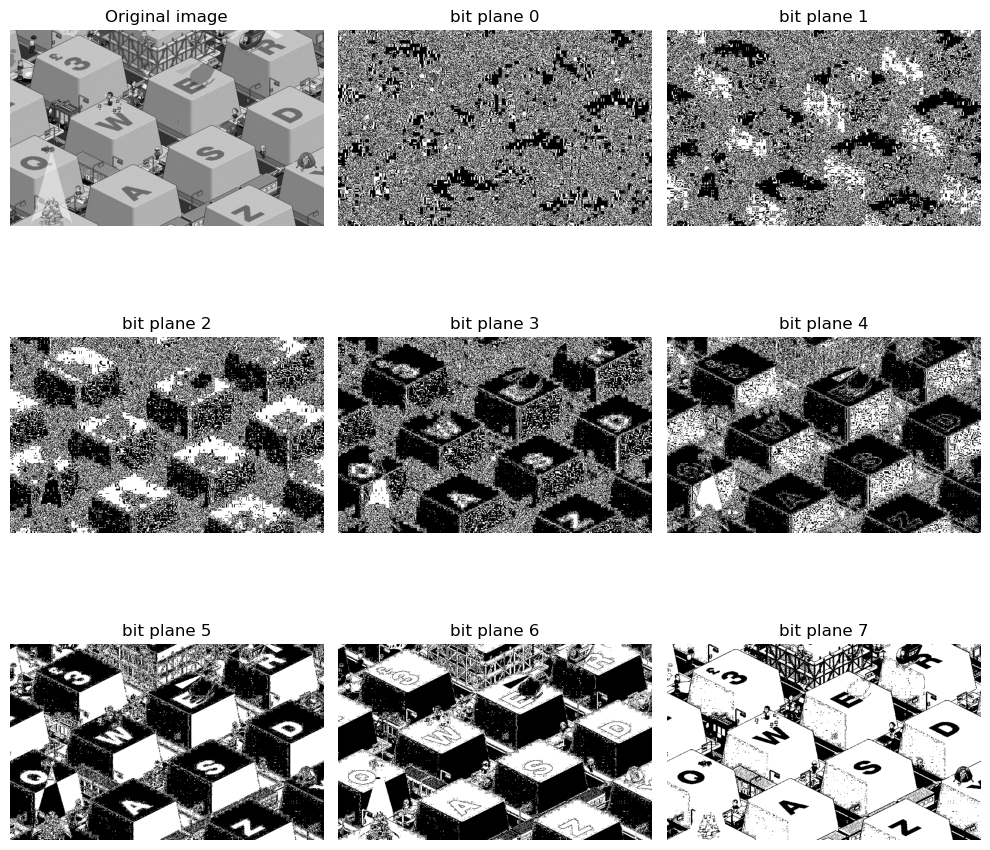

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/home/soheil/Pictures/QWERTY.jpeg', cv2.IMREAD_GRAYSCALE)
sliced = []

for i in range(8):
    plane = np.full(image.shape, 2 ** i, np.uint8)
    res = cv2.bitwise_and(plane, image)
    fimg = res * 255
    sliced.append(fimg)

fig, axes = plt.subplots(3, 3, figsize= (10,10))

axes[0,0].imshow(image, cmap="gray")
axes[0,0].set_title('Original image')
axes[0,0].axis('off')

for i in range(8):
    row, col = divmod(i+1, 3)
    axes[row, col].imshow(sliced[i], cmap="gray")
    axes[row, col].set_title(f'bit plane {i}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

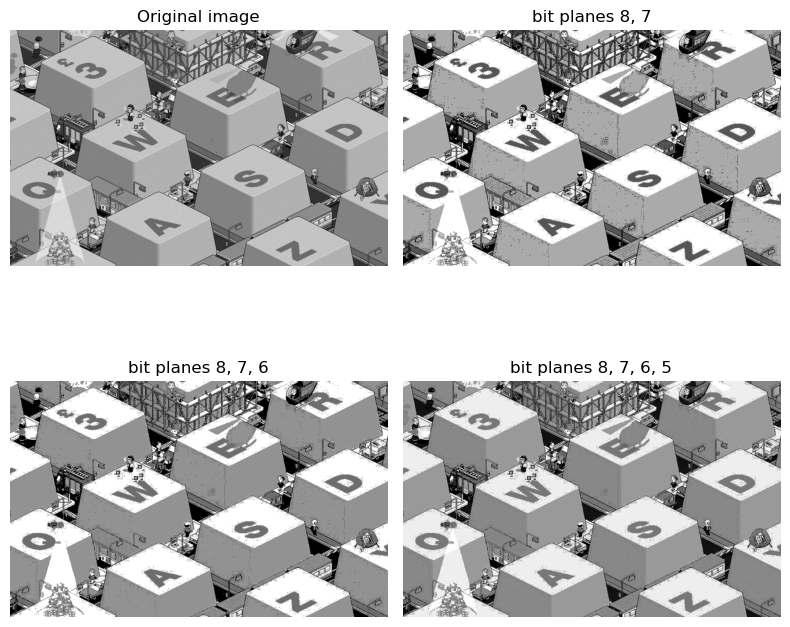

In [2]:
bit_pln = [(image >> i) & 1 for i in range(8)]

bp_7_8 = (bit_pln[7] * 128) + (bit_pln[6] * 64)
bp_6_7_8 = (bit_pln[6] * 32) + bp_7_8
bp_5_6_7_8 = (bit_pln[5] * 16) + bp_6_7_8

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0,0].imshow(image, cmap="gray")
axes[0,0].set_title('Original image')
axes[0,0].axis('off')

axes[0,1].imshow(bp_7_8, cmap="gray")
axes[0,1].set_title('bit planes 8, 7')
axes[0,1].axis('off')

axes[1,0].imshow(bp_6_7_8, cmap="gray")
axes[1,0].set_title('bit planes 8, 7, 6')
axes[1,0].axis('off')

axes[1,1].imshow(bp_5_6_7_8, cmap="gray")
axes[1,1].set_title('bit planes 8, 7, 6, 5')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()
